# Logistic Regression with Python

For this problem we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set  in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

## The Data
 
 Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

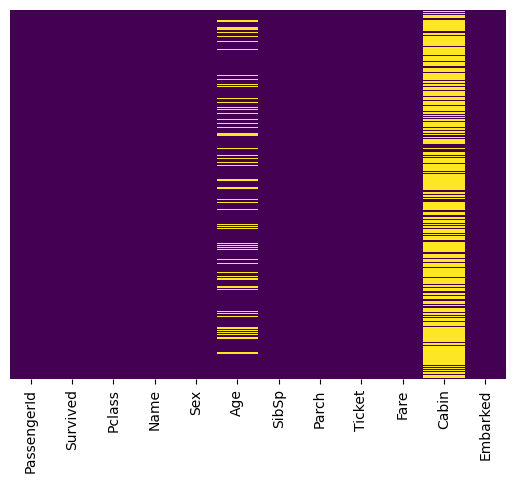

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<Axes: xlabel='Survived', ylabel='count'>

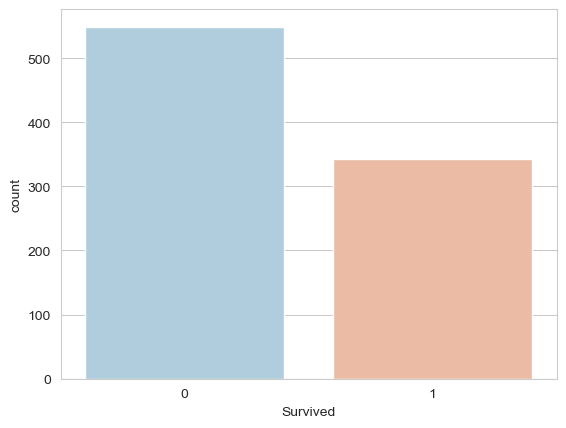

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

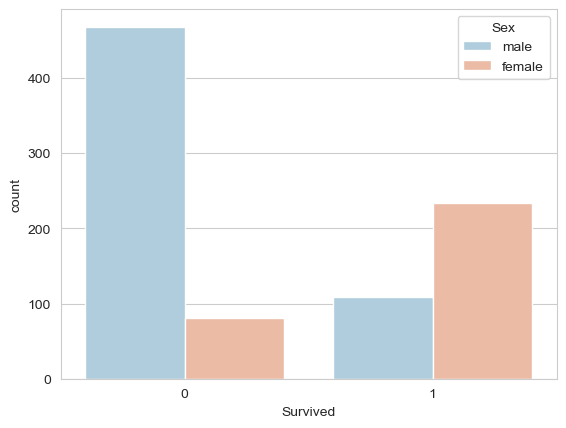

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

* The plot suggests that many males in the train did not survive
* However this might be caused by the fact that the train had a lot of males than females

Let us further check the proportion of males compared to females

In [8]:
Total_passengers = train['PassengerId'].count()
Total_males = train['PassengerId'][train['Sex']=='male'].count()
Total_females = train['PassengerId'][train['Sex']=='female'].count()
print(f'{Total_passengers} passengers ')
print(f'{Total_males} were males ')
print(f'{Total_females} were females ')

891 passengers 
577 were males 
314 were females 


* Males were approximately twice as much as the number of females

In [9]:
BySurvival= train.groupby('Survived')['Sex'].value_counts()
BySurvival

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

* from $577$ males, only $109$ survived
* from $314$ males, only $233$ survived

* let us calculate the survival rate per gender

* out of $891$ passengers, only $342$ survived

In [10]:
Total_Survival = (342/891)*100
print(f'Just above {int(Total_Survival)}% of passengers survived "\U0001F622"')

Just above 38% of passengers survived "😢"


In [11]:
M_survival_rate = (109/577)*100
F_survival_rate = (233/314)*100

print(f'There is {M_survival_rate:.2f}% chance that a male will survive')
print(f'There is {F_survival_rate:.2f}% chance that a female will survive')

There is 18.89% chance that a male will survive
There is 74.20% chance that a female will survive


* According to the survival rate of passengers;
* females are more likely to survive than males
* This does not make sence to me, since we know that males are more stronger and I was expecting their majority to survive

* Apart from Gender, maybe there are other factors affecting the survival of a passenger

Let us investigate the survival based on the passenger class

<Axes: xlabel='Survived', ylabel='count'>

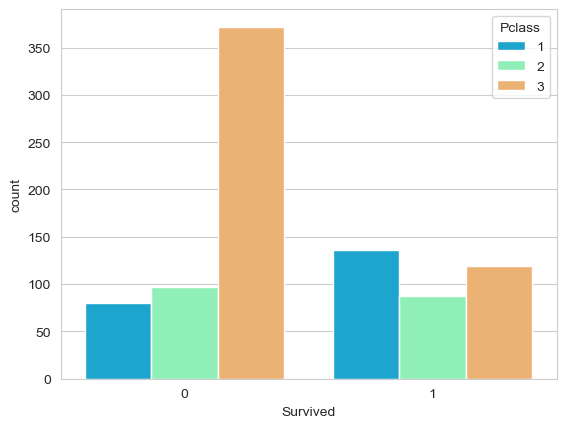

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

* The plot above shows that passengers in the third class died the most 
* This might suggest that the 3rd class is less safer than other classes, of course it is cheaper
* However, it might be the case that we had a lot of people in the 3rd class

let us check the number of people in the 3rd class compared to other classes:

In [13]:
ByPclass= train.groupby('Pclass')['Survived'].value_counts()
ByPclass

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

We further calculate the survival rate based on the passenger class

In [14]:
class_1 = (136/(136+80))*100
class_2 = (87/(87+97))*100
class_3 = (119/(119+372))*100

print(f'First_class: {class_1:.2f}% chance of surviving')
print(f'Second_class: {class_2:.2f}% chance of surviving')
print(f'Third_class: {class_3:.2f}% chance of surviving')

First_class: 62.96% chance of surviving
Second_class: 47.28% chance of surviving
Third_class: 24.24% chance of surviving


* It seems that the 1st class is much safer than any other passenger class

lets further investigate how the age can affect the survival

C:\Users\cebis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


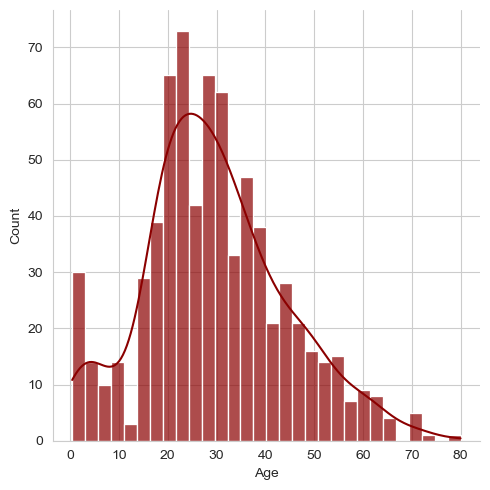

In [15]:
# Age Distribution
sns.displot(train['Age'].dropna(),kde=True,color='darkred',bins=30,alpha=0.7)

* It looks like many passengers had an age between 20-30 years old

In [16]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

* The average age is 30 years
* The oldest person is 80 years old
* The youngest person is less than a year old (5 months old baby)

Let us check the age distribution based of the passenger class

The average age per passenger class:

In [17]:
ByPclass = train.groupby('Pclass')['Age'].mean()
ByPclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

* We can see the wealthier passengers in the higher classes tend to be older, which makes sense.
* We see that probably many young people died because there is a lot of them in the 3rd class 

We further check how does travelling with a companion affected the survival

This is probably not a variable that is likely to influence the survival of a passenger

<Axes: xlabel='SibSp', ylabel='count'>

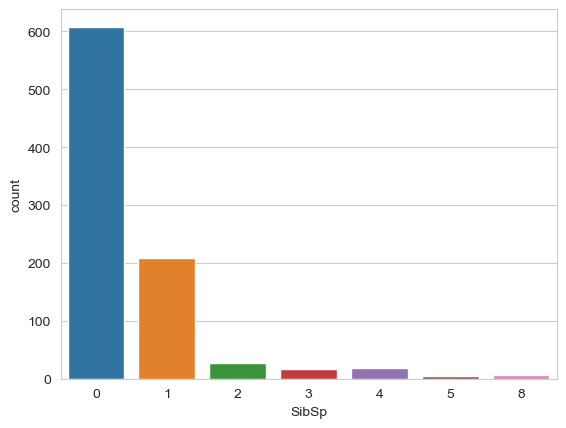

In [18]:
# sibling/spouse
sns.countplot(x='SibSp',data=train)

* Many passengers were travelling alone

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<Axes: xlabel='Pclass', ylabel='Age'>

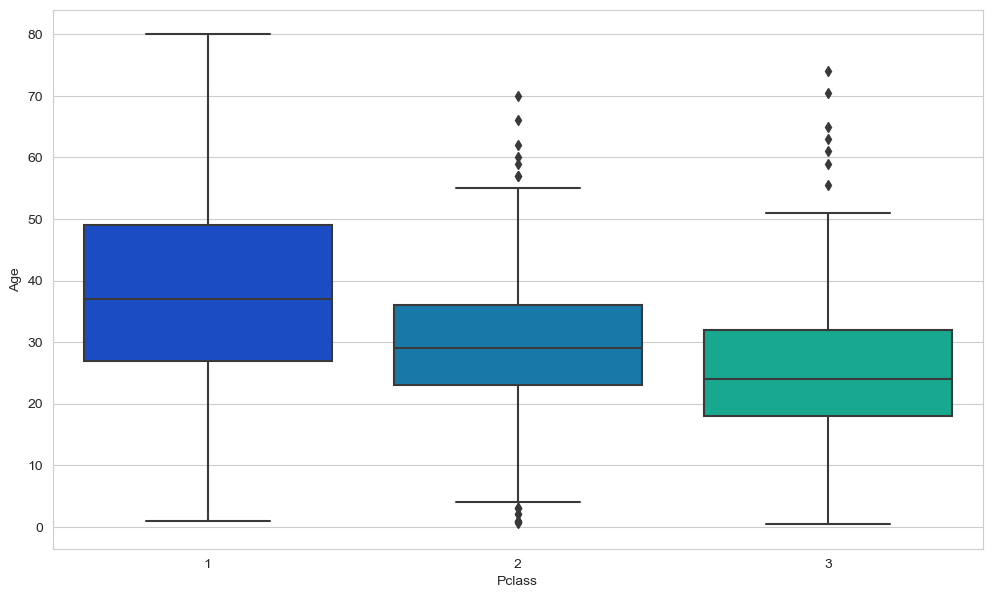

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense since older people are more likely to have worked and accumulated a lot of wealth.


We'll use these average age values to impute based on Pclass for Age.

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

Now apply the above function!

In [21]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

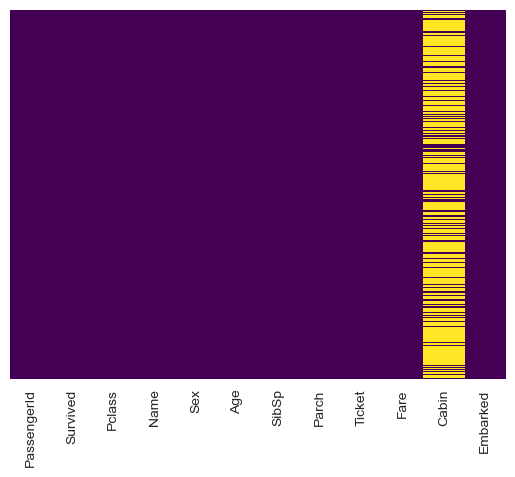

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* We have amputated the age using the mean age per passenger class
* Now let us remove the Cabin since we have a lot of missing values

In [23]:
train.drop('Cabin',axis=1,inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
train.dropna(inplace=True)

<Axes: >

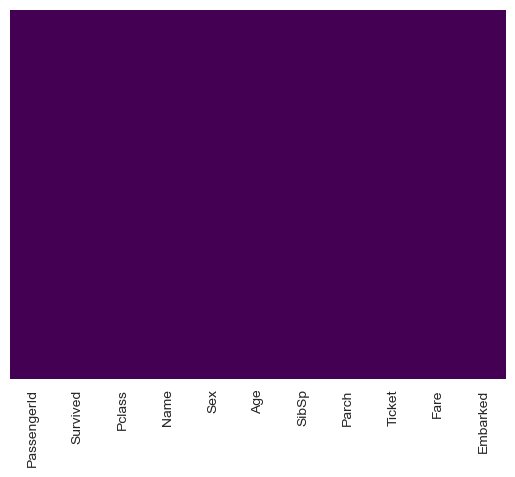

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Nothing is missing anymore

# The Data is now cleaned

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


* Now we need to convert categorical Data into data variable(s)

In [28]:
#Now we need to convert categorical Data into data variable(s)
pd.get_dummies(train['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


But we still have a slight problem, the female column is the perfect predictor of the male column and visa-vesa
This will be a problem to our Machine learning model since these variables are perfectly (linearly) correlated (have the same information) \
We need to drop one column

In [29]:
#drop one column
pd.get_dummies(train['Sex'], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [30]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [31]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


Do the same for the "Embarked" column

In [32]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [33]:
# Add the new columns to the 'train' DataFrame
train = pd.concat([train, sex, embark], axis=1)

In [34]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False


In [35]:
# Drop the feature columns
train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [37]:
# Drop 'PassengerId', its not useful. its just a number of passenegrs
train.drop('PassengerId', axis=1, inplace=True)

In [38]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


This looks perfect for the Machine Learning Algorithm (All the Data is numerical)

Great! Our data is ready for our model!

# Building a Logistic Regression model 
# To predict if a passenger Survived Based on the other varibles

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).


In [39]:
#split the Data into X and y
X = train.drop('Survived', axis=1)

y = train['Survived']

## Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
# import linearRegression Model
from sklearn.linear_model import LogisticRegression

In [43]:
# instantiate
logmodel = LogisticRegression()

In [44]:
logmodel.fit(X_train, y_train)

C:\Users\cebis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

* Let us compare the predictions with the original Survival:

In [46]:
Survival = np.array(y_test)
Survival

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0], dtype=int64)

* The model's prediction is not bad from what I see above

We will evaluate the model to check its accuracy

## Evaluation

We can check precision,recall,f1-score using classification report!

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



* Indeed the Model has a high precision
* It is $83$% accurate

we can also use a Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)

Not so bad! We might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* In future we will look at the other info we can get from the ticket?
